# Swithching Power e Conduction Power (Testing)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df_waves = pd.read_csv('waves_NPC.csv')
df_waves = df_waves.set_index('Time')
df_waves.index -= df_waves.index[0]; df_waves.head()

,Iout,Vin_m,Vtri2_m,Vtri1_m,Va1,Vc1,Vd1,Vb1,Vout,V40,Vd2,Vload
Time,,,,,,,,,,,,
0.000000,-5.913070e-21,0.117244,-304.78,6.22,0,1,0,1,-1.597120e-18,4.000000e-10,-4.000000e-10,-5.913620e-22
0.000001,-5.910880e-21,0.234488,-298.56,12.44,0,1,0,1,-1.597120e-18,4.000000e-10,-4.000000e-10,-1.182510e-21
0.000002,-5.908690e-21,0.351733,-292.34,18.66,0,1,0,1,-1.597120e-18,4.000000e-10,-4.000000e-10,-1.773480e-21
0.000003,-5.906510e-21,0.468977,-286.12,24.88,0,1,0,1,-1.597120e-18,4.000000e-10,-4.000000e-10,-2.364240e-21
0.000004,-5.904320e-21,0.586221,-279.90,31.10,0,1,0,1,-1.597120e-18,4.000000e-10,-4.000000e-10,-2.954790e-21


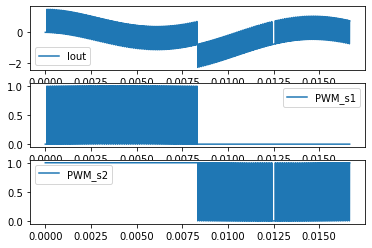

In [20]:
pwm_s1 = df_waves.loc[:1/60, 'Va1']
pwm_s2 = df_waves.loc[:1/60, 'Vc1']

Iout = df_waves.loc[:1/60, 'Iout']

plt.figure()
plt.subplot(311)
plt.plot(Iout, label = 'Iout')
plt.legend()
plt.subplot(312)
plt.plot(pwm_s1, label = 'PWM_s1')
plt.legend()
plt.subplot(313)
plt.plot(pwm_s2, label = 'PWM_s2')
plt.legend()
plt.show()

In [2]:
from npcModule import detectCommutation, switchingLosesNPC

In [25]:
import pickle

with open('models\\SKM400GB125D.pklmod', 'rb') as filep:
    model = pickle.load(filep)

In [29]:
100e3/60*4

6666.666666666667

In [26]:
model

{'eon': poly1d([1.23e-10, 1.39e-08, 6.96e-05, 4.64e-03]),
 'eoff': poly1d([ 1.72e-10, -1.57e-07,  1.05e-04, -1.04e-03]),
 'erec': poly1d([ 7.25e-11, -1.32e-07,  8.53e-05,  1.81e-03]),
 'eDon': None}

### Ap. Gráfico com os polinômios gerados para cada equação de energia

In [8]:
i = np.linspace(0, 1000, 200)

eon  = model
eoff = eoff2
erec = erec2

In [9]:
eon_p  = eon(i)
eoff_p = eoff(i)
erec_p = erec(i)

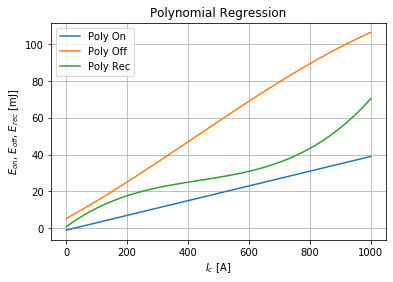

In [10]:
plt.plot(i, eon_p *1e3, label='Poly On')
plt.plot(i, eoff_p*1e3, label='Poly Off')
plt.plot(i, erec_p*1e3, label='Poly Rec')
plt.title('Polynomial Regression') 
plt.xlabel('$I_c$ [A]') 
plt.ylabel('$E_{on}$, $E_{off}$, $E_{rec}$ [mJ]')
plt.grid()
plt.legend()
# plt.xlim(100, 600)
plt.show()

### 3. Parametrizando as curvas $E_{on}$, $E_{off}$ e $E_{rec}$, retiradas de um manual da Semikron para o teste das perdas em comutação com os sinais acima

In [11]:
# Parâmetros de um manual da Semikron (SKiM301MLI12E4)

np.set_printoptions(precision=2)

print('Typ. IGBT1 & Diode5')
print('eon_params:', eon_params1)
print('eoff_params:', eoff_params1)
print('erec_params:', erec_params1)

print('\nTyp. IGBT2 & Diode1')
print('eon_params:', eon_params2)
print('eoff_params:', eoff_params2)
print('erec_params:', erec_params2)

Typ. IGBT1 & Diode5
eon_params: [-4.27e-10  6.25e-07 -1.34e-04  1.82e-02]
eoff_params: [ 3.73e-11 -4.70e-08  1.09e-04  4.71e-03]
erec_params: [ 1.75e-10 -2.73e-07  1.54e-04 -2.92e-03]

Typ. IGBT2 & Diode1
eon_params: [-4.63e-25  1.56e-22  4.00e-05 -1.00e-03]
eoff_params: [-3.73e-11  4.70e-08  9.14e-05  5.29e-03]
erec_params: [ 1.66e-10 -2.18e-07  1.21e-04  8.47e-04]


In [12]:
P_sw, tmp = tableSwitchingLosses3(
    s1, s2, sim_current, t[-1], 
    eon1, eoff1, erec1, eon2, eoff2, erec2)

state, current_bool, state_cur = tmp

stateA, stateB, stateC, stateD = state
current_pos, current_neg = current_bool

(stateA_cur_pos, stateA_cur_neg),\
(stateB_cur_pos, stateB_cur_neg),\
(stateC_cur_pos, stateC_cur_neg),\
(stateD_cur_pos, stateD_cur_neg) = state_cur

### 5. Plots que mostram quando a corrente foi detectada como positiva, negativa e o mesmo para a comutação

c:\users\tiarl\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
c:\users\tiarl\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
c:\users\tiarl\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollec

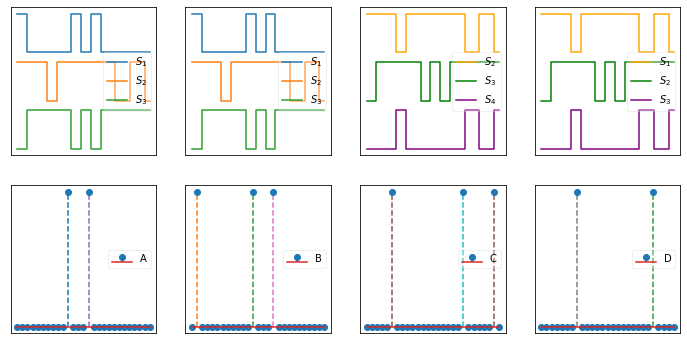

In [13]:
def posChart(ax):
    ax.legend(loc=7, framealpha=.3)
    ax.set_xticks([])
    ax.set_yticks([])

fig, ax = plt.subplots(2, 4, figsize=(12,6))

ax[0][0].step(range(s1.size), s1+3.75, where='post', label='$S_1$')
ax[0][0].step(range(s2.size), s2+2.5, where='post', label='$S_2$')
ax[0][0].step(range(s3.size), s3+1.25, where='post', label='$S_3$')
posChart(ax[0][0])

ax[1][0].stem(range(1, s1.size), stateA, linefmt='--', label='A')
posChart(ax[1][0])

ax[0][1].step(range(s1.size), s1+3.75, where='post', label='$S_1$')
ax[0][1].step(range(s1.size), s2+2.5, where='post', label='$S_2$')
ax[0][1].step(range(s1.size), s3+1.25, where='post', label='$S_3$')
posChart(ax[0][1])

ax[1][1].stem(range(1, s1.size), stateB, linefmt='--', label='B')
posChart(ax[1][1])



ax[0][2].step(range(s1.size), s2+3.75, where='post', label='$S_2$', color='orange')
ax[0][2].step(range(s2.size), s3+2.5, where='post', label='$S_3$', color='green')
ax[0][2].step(range(s3.size), s4+1.25, where='post', label='$S_4$', color='purple')
posChart(ax[0][2])

ax[1][2].stem(range(1, s1.size), stateC, linefmt='--', label='C')
posChart(ax[1][2])

ax[0][3].step(range(s1.size), s2+3.75, where='post', label='$S_1$', color='orange')
ax[0][3].step(range(s1.size), s3+2.5, where='post', label='$S_2$', color='green')
ax[0][3].step(range(s1.size), s4+1.25, where='post', label='$S_3$', color='purple')
posChart(ax[0][3])

ax[1][3].stem(range(1, s1.size), stateD, linefmt='--', label='D')
posChart(ax[1][3])

plt.legend(loc=7, framealpha=.3)
xmin, _ = plt.xlim()
plt.show()

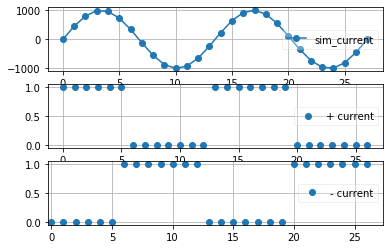

In [14]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(sim_current, '-o', label='sim_current')
ax[0].legend(loc=7, framealpha=.3)
ax[0].grid()
ax[1].plot(current_pos, 'o', label='+ current')
ax[1].legend(loc=7, framealpha=.3)
ax[1].grid()
ax[2].plot(current_neg, 'o', label='- current')
ax[2].legend(loc=7, framealpha=.3)
ax[2].grid()

_, xmax = plt.xlim()
plt.xlim(xmin, xmax)
plt.show()

### 6. Multiplicação dos vetores de comutação e sentido da corrente para para setar o estado em comutação ocorreu e acumular devidamente $E_{on}$,  $E_{off}$ e $E_{rec}$ & Os vetores de corrente para cada estágio em que as comutações ocorreram

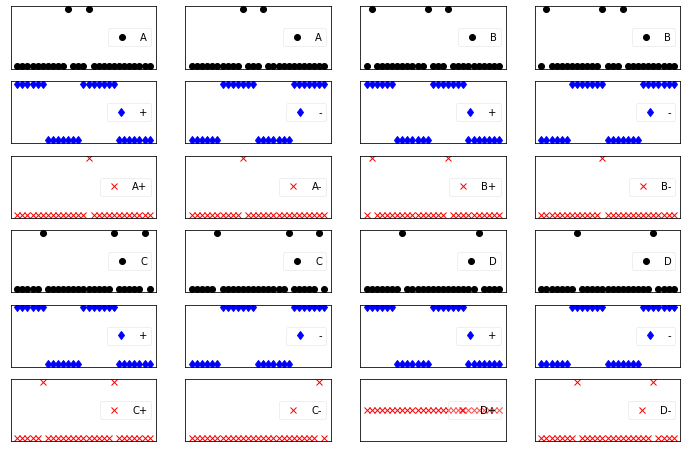

In [15]:
def posChart(ax):
    ax.legend(loc=7, framealpha=.3)
    ax.set_xticks([])
    ax.set_yticks([])

fig, ax = plt.subplots(6, 4, figsize=(12,8))

for axt in [ax[0][0], ax[0][1]]:
    axt.plot(stateA, 'ko ', label='A')
    posChart(axt)

for axt in [ax[0][2], ax[0][3]]:
    axt.plot(stateB, 'ko ', label='B')
    posChart(axt)

for axt in [ax[3][0], ax[3][1]]:
    axt.plot(stateC, 'ko ', label='C')
    posChart(axt)

for axt in [ax[3][2], ax[3][3]]:
    axt.plot(stateD, 'ko ', label='D')
    posChart(axt)

#%%
    
for axt in [ax[1][0], ax[1][2], ax[4][0], ax[4][2]]:
    axt.plot(current_pos, 'bd ', label='+')
    posChart(axt)

for axt in [ax[1][1], ax[1][3], ax[4][1], ax[4][3]]:
    axt.plot(current_neg, 'bd ', label='-')
    posChart(axt)

#%%

for axt, y, label in zip([ax[2][0], ax[2][1], ax[2][2], ax[2][3], ax[5][0], ax[5][1], ax[5][2], ax[5][3]],
                  [stateA_cur_pos, stateA_cur_neg, stateB_cur_pos, stateB_cur_neg, 
                   stateC_cur_pos, stateC_cur_neg, stateD_cur_pos, stateD_cur_neg],
                  ['A+', 'A-', 'B+', 'B-', 'C+', 'C-', 'D+', 'D-']):
    axt.plot(y, 'rx ', label=label)
    posChart(axt)


### 7. Resultado Final das potências dissipadas de cada um dos semicondutores $S_1$, $S_2$, $D_1$ e $D_2$ , em Watts

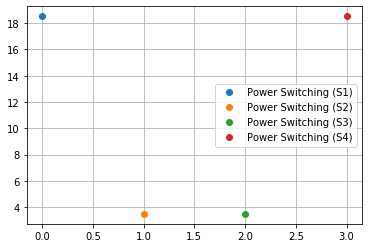

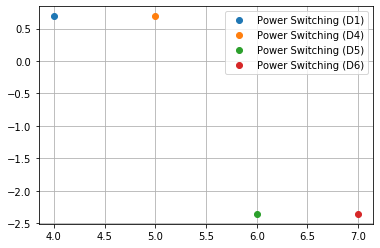

In [16]:
plt.plot([0], P_sw['S1'], 'o', label='Power Switching (S1)')
plt.plot([1], P_sw['S2'], 'o', label='Power Switching (S2)')
plt.plot([2], P_sw['S3'], 'o', label='Power Switching (S3)')
plt.plot([3], P_sw['S4'], 'o', label='Power Switching (S4)')
plt.grid()
plt.legend()
plt.show()

plt.plot([4], P_sw['D1'], 'o', label='Power Switching (D1)')
plt.plot([5], P_sw['D4'], 'o', label='Power Switching (D4)')
plt.plot([6], P_sw['D5'], 'o', label='Power Switching (D5)')
plt.plot([7], P_sw['D6'], 'o', label='Power Switching (D6)')
plt.grid()
plt.legend()
plt.show()